In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [46]:
def warpImage(image, H, dims):
    """
    Warp the given image using the homography matrix.
    
    Args:
        image: The image to be warped.
        H: The homography matrix.
        dims: The dimensions of the output image (typically the size of the second image).
        
    Returns:
        The warped image.
    """
    warped = cv2.warpPerspective(image, H, dims)
    return warped

In [47]:
def plotSideBySide(query_image, train_image, savefig_name, xlabel_a, xlabel_b):

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
    ax1.imshow(query_image)
    ax1.set_xlabel(xlabel_a, fontsize=14)

    ax2.imshow(train_image)
    ax2.set_xlabel(xlabel_b, fontsize=14)

    # Statement to be printed below the images
    plt.savefig(savefig_name+".png", bbox_inches="tight")
    plt.show()
    plt.close()

In [48]:
def computeReprojectionError(ptsA, ptsB, H):
    """
    Compute the reprojection error between matched chessboard corners.
    
    Args:
        ptsA: Detected chessboard corners from image A (numpy array of 2D points).
        ptsB: Detected chessboard corners from image B (numpy array of 2D points).
        H: The homography matrix.
        
    Returns:
        The reprojection error.
    """
    # ptsA and ptsB are already in the correct format (2D numpy arrays).
    # Transform points in image A to the coordinate system of image B using homography H
    ptsA_transformed = cv2.perspectiveTransform(ptsA, H)
    
    # Calculate Euclidean distance between actual keypoints in B and transformed points
    error = np.linalg.norm(ptsA_transformed[0] - ptsB, axis=1)
    
    # Average reprojection error
    reprojection_error = np.mean(error)
    return reprojection_error


In [49]:
def drawPoints(image1, image2, points1, points2):

    image1_bgr = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
    image2_bgr = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)

    for point in points1:
        x, y = point[0]
        cv2.circle(image1_bgr, (int(x), int(y)), radius=5, color=(255, 0, 0), thickness=-1)  # Blue dots

    for point in points2:
        x, y = point[0]
        cv2.circle(image2_bgr, (int(x), int(y)), radius=5, color=(255, 0, 0), thickness=-1)  # Blue dots

    # Convert back to RGB for displaying with Matplotlib
    image1_rgb = cv2.cvtColor(image1_bgr, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2RGB)

    # Create subplot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the images in the subplot
    axes[0].imshow(image1_rgb)
    axes[0].set_title("Image 1 with Points")

    axes[1].imshow(image2_rgb)
    axes[1].set_title("Image 2 with Points")

    # Save the subplot as a new image
    plt.tight_layout()
    plt.savefig('images_with_points.png', bbox_inches="tight")
    plt.show()

# ORB Detector

/tmp/ipykernel_144765/80897493.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  train_image = imageio.imread("./Cube/3-removebg-preview.png")
/tmp/ipykernel_144765/80897493.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  query_image = imageio.imread("./Cube/1-removebg-preview.png")


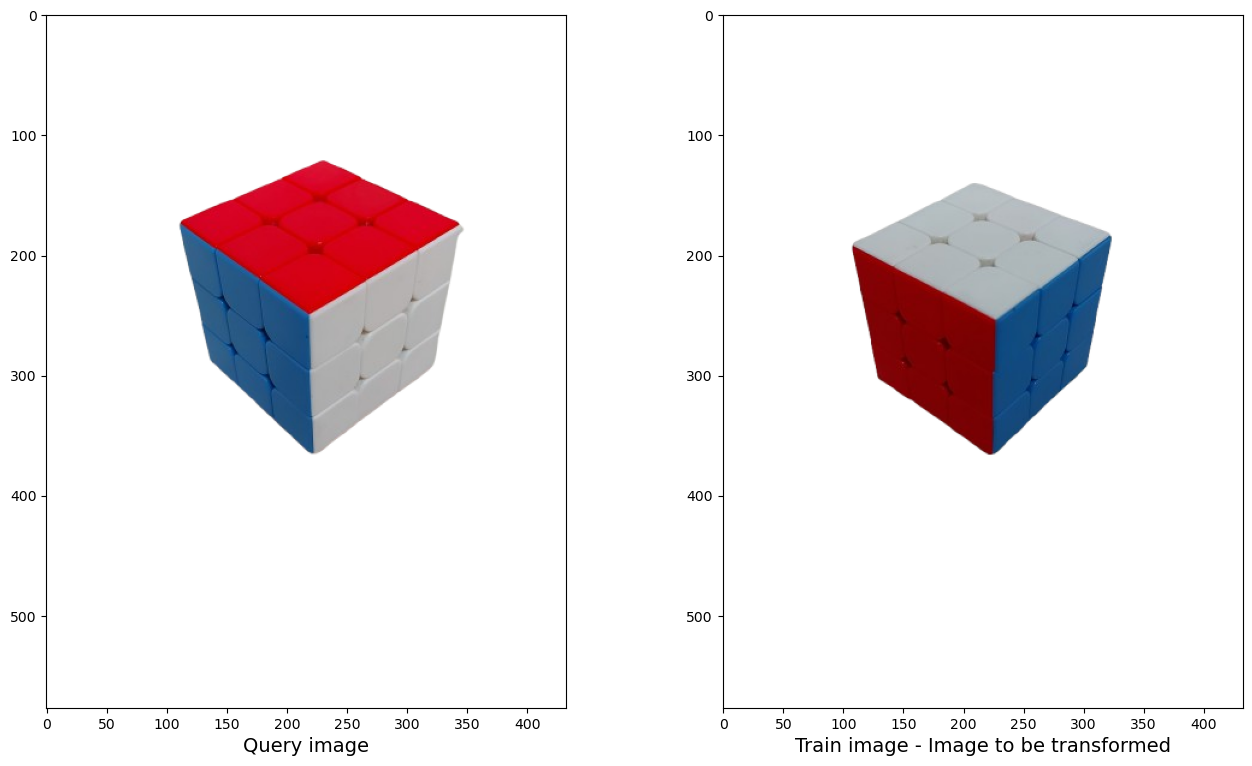

In [50]:
train_image = imageio.imread("./Cube/3-removebg-preview.png")
train_image_gray = cv2.cvtColor(train_image, cv2.COLOR_RGB2GRAY)
query_image = imageio.imread("./Cube/1-removebg-preview.png")
query_image_gray = cv2.cvtColor(query_image,cv2.COLOR_RGB2GRAY)

plotSideBySide(query_image, train_image, "Images_Cube", "Query image", "Train image - Image to be transformed")

In [51]:
keypointsA = np.array([[[320, 183]], [[226, 253]], [[108, 192]], [[209, 141]], [[301, 290]], [[224, 364]], [[128, 302]]], dtype=np.float32)
keypointsB = np.array([[[221, 364]], [[218, 249]], [[342, 174]], [[322, 289]], [[136, 287]], [[111, 174]], [[229, 122]]], dtype=np.float32)

[[[320. 183.]]

 [[226. 253.]]

 [[108. 192.]]

 [[209. 141.]]

 [[301. 290.]]

 [[224. 364.]]

 [[128. 302.]]]
(7, 1, 2)
---------------------------------------------------------------------------------------------------------------
[[[221. 364.]]

 [[218. 249.]]

 [[342. 174.]]

 [[322. 289.]]

 [[136. 287.]]

 [[111. 174.]]

 [[229. 122.]]]
(7, 1, 2)


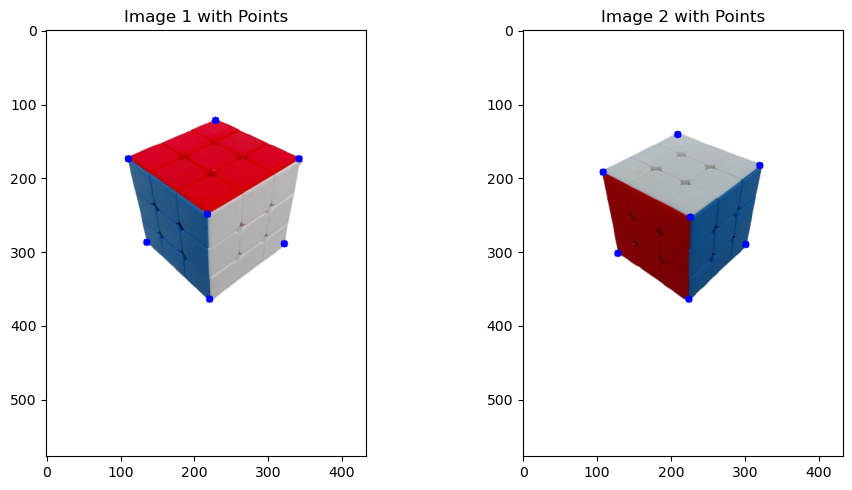

In [52]:
print(keypointsA)
print(keypointsA.shape)
print("---------------------------------------------------------------------------------------------------------------")
print(keypointsB)
print(keypointsB.shape)


drawPoints(query_image, train_image, keypointsB, keypointsA)
# # Draw and display the corners
# train_image_copy = train_image
# query_image_copy = query_image

# cv2.drawChessboardCorners(train_image_copy, (cols, rows), keypointsA, True)
# cv2.drawChessboardCorners(query_image_copy, (cols, rows), keypointsB, True)
# cv2.imwrite("1-removebg-preview-corners.png", train_image_copy)
# cv2.imwrite("5-removebg-preview-corners.png", query_image_copy)

# cv2.destroyAllWindows()

In [53]:
# M = getHomography(keypointsA, keypointsB, matches, reprojThresh=5)
H, _ = cv2.findHomography(keypointsA, keypointsB, cv2.RANSAC, 5)
print(H)

[[-5.44904366e-01 -9.32607094e-01  5.63187072e+02]
 [ 8.83938627e-01 -6.30636050e-01  1.90381033e+02]
 [ 1.41476725e-04 -3.18828769e-04  1.00000000e+00]]


In [54]:
# Warp image A into image B's space
warped_image = warpImage(train_image, H, (query_image.shape[1], query_image.shape[0]))

# Compute the reprojection error
error = computeReprojectionError(keypointsA, keypointsB, H)
print("Reprojection error:", error)

Reprojection error: 93.56537


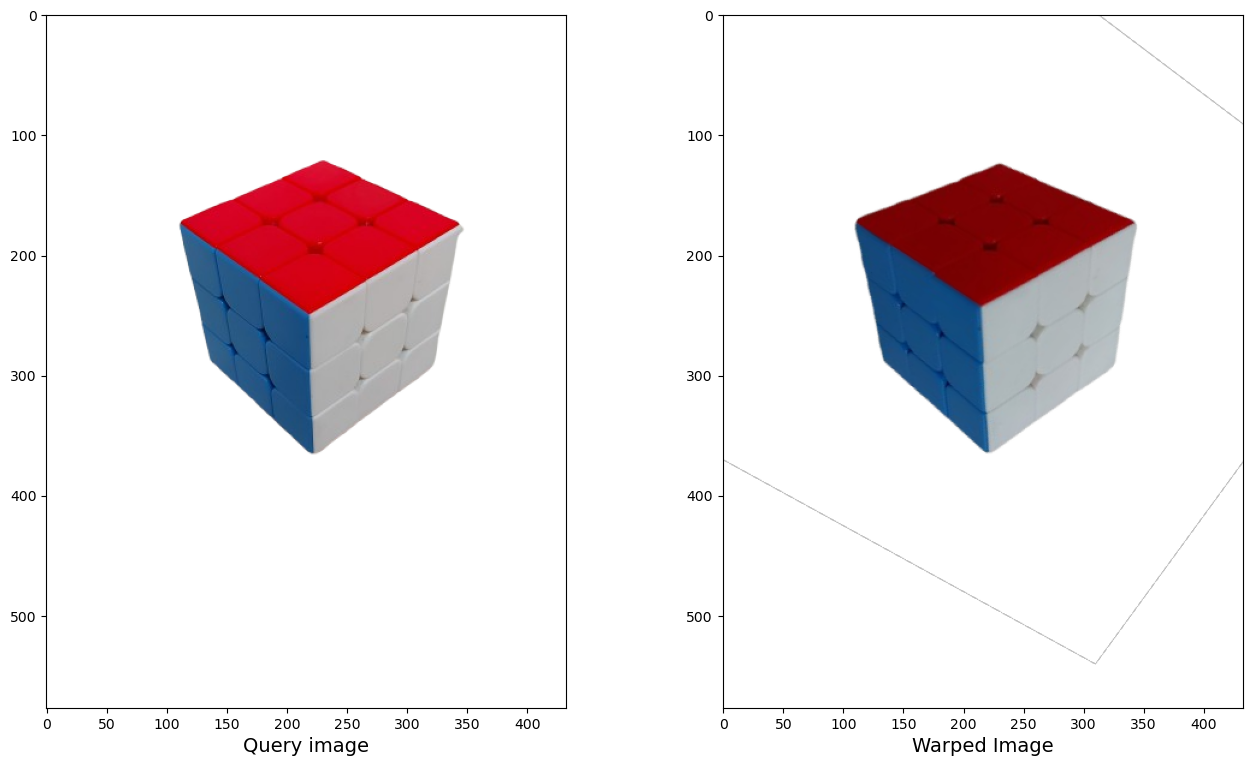

In [55]:
plotSideBySide(query_image, warped_image, "Final_Cube_Corners", "Query image", "Warped Image")